# Data Preprocessing

## 1. Import all the crucial libraries


- **NumPy** – NumPy is the fundamental package for scientific calculation in Python. Hence, it is used for inserting any type of mathematical operation in the code. Using NumPy, you can also add large multidimensional arrays and matrices in your code. 
- **Pandas** – Pandas is an excellent open-source Python library for data manipulation and analysis. It is extensively used for importing and managing the datasets. It packs in high-performance, easy-to-use data structures and data analysis tools for Python.
- **Matplotlib** – Matplotlib is a Python 2D plotting library that is used to plot any type of charts in Python. It can deliver publication-quality figures in numerous hard copy formats and interactive environments across platforms (IPython shells, Jupyter notebook, web application servers, etc.). 



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Import the dataset


In [4]:
data_set = pd.read_csv('Data.csv')

In [5]:
# explore the first 5 rows in the data
data_set.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### extract the independent and unindependent variables

In [13]:
# independent variables
X = data_set.iloc[:,:-1].values  

In [14]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [9]:
# unindependent variables
y = data_set.iloc[:,-1].values  

In [11]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## 3. Identifying and handling the missing values

Basically, there are two ways to handle missing data:

  - **Deleting a particular row** – In this method, you remove a specific row that has a null value for a feature or a particular column where more than 75% of the values are missing. However, this method is not 100% efficient, and it is recommended that you use it only when the dataset has adequate samples. You must ensure that after deleting the data, there remains no addition of bias. 
  - **Calculating the mean** – This method is useful for features having numeric data like age, salary, year, etc. Here, you can calculate the mean, median, or mode of a particular feature or column or row that contains a missing value and replace the result for the missing value. This method can add variance to the dataset, and any loss of data can be efficiently negated. Hence, it yields better results compared to the first method (omission of rows/columns). Another way of approximation is through the deviation of neighbouring values. However, this works best for linear data.


In [15]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## 4. Encoding the categorical data

Categorical data refers to the information that has specific categories within the dataset. In the dataset cited above, there are two categorical variables – country and purchased.

Machine Learning models are primarily based on mathematical equations. Thus, you can intuitively understand that keeping the categorical data in the equation will cause certain issues since you would only need numbers in the equations.

### How to encode the country variable?

As seen in our dataset example, the country column will cause problems, so you must convert it into numerical values. To do so, you can use the LabelEncoder() class from the sci-kit learn library. The code will be as follows

In [16]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [17]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


## 5. Splitting the dataset

Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set. 

Training set denotes the subset of a dataset that is used for training the machine learning model. Here, you are already aware of the output. A test set, on the other hand, is the subset of the dataset that is used for testing the machine learning model. The ML model uses the test set to predict outcomes. 

Usually, the dataset is split into 70:30 ratio or 80:20 ratio. This means that you either take 70% or 80% of the data for training the model while leaving out the rest 30% or 20%. The splitting process varies according to the shape and size of the dataset in question. 

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [20]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [21]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [22]:
print(y_test)

[0 1]


## 6. Feature scaling

Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range. In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

In the dataset, you can notice that the age and salary columns do not have the same scale. In such a scenario, if you compute any two values from the age and salary columns, the salary values will dominate the age values and deliver incorrect results. Thus, you must remove this issue by performing feature scaling for Machine Learning.

Most ML models are based on Euclidean Distance, which is represented as:
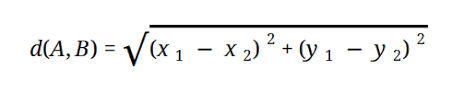

You can perform feature scaling in Machine Learning in two ways:

### Standardization
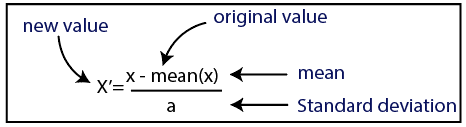

### Normalization
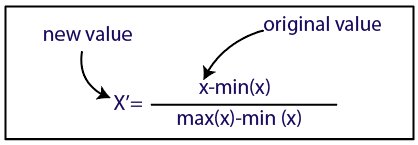

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [24]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [25]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
